In [1]:
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import numpy as np
import joblib
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
mdf = pd.read_pickle("df_coeff.pkl")

In [3]:
mdf= mdf[['GasTemp', 'GasRH', 'H2SConcentration', 'flowRate', 'H/C', 'pH','C', 'N/C', 'O',
            'S_Bet','PyrolisTemp', 'BiocharRH', 'particleSize','S_Weight', 'Col_d', 'Col_h', 'a', 'b', 'K', 'T']]
Features= mdf[['GasRH', 'H2SConcentration', 'flowRate','C', 'H/C', 'pH',
            'S_Bet','PyrolisTemp', 'BiocharRH', 'particleSize','S_Weight', 'Col_h']]
Target= mdf[['a', 'b', 'K', 'T']]
df=mdf[['GasRH', 'H2SConcentration', 'flowRate','C', 'H/C', 'pH',
            'S_Bet','PyrolisTemp', 'BiocharRH', 'particleSize','S_Weight', 'Col_h', 'a', 'b', 'K', 'T']]
df = df.rename(columns={'H2SConcentration': 'H2S'})
df = df.rename(columns={'PyrolisTemp': 'PTemp'})
df = df.rename(columns={'particleSize': 'PSize'})
df = df.rename(columns={'flowRate': 'FlowR'})
df = df.rename(columns={'BiocharRH': 'BRH'})
df = df.rename(columns={'S_Bet': 'SBet'})
df = df.rename(columns={'S_Weight': 'SW'})
df = df.rename(columns={'Col_h': 'ColH'})

In [6]:
df

,GasRH,H2S,FlowR,C,H/C,pH,SBet,PTemp,BRH,PSize,SW,ColH,a,b,K,T
0,0.0,50.0,40.0,22.20,0.355856,5.25,2.10,100.0,0.0,0.825,1.0,150.0,4.193433,29.056448,10.494361,25.183979
1,0.0,50.0,40.0,22.20,0.355856,5.40,6.40,200.0,0.0,0.825,1.0,150.0,6.924287,134.811274,28.650561,123.303715
2,0.0,50.0,40.0,22.20,0.355856,6.00,11.30,300.0,0.0,0.825,1.0,150.0,9.622541,149.748901,21.947262,140.847082
3,0.0,50.0,40.0,22.20,0.355856,9.50,20.35,400.0,0.0,0.825,1.0,150.0,17.551036,513.425181,42.378810,494.556257
4,0.0,50.0,40.0,22.20,0.355856,9.00,22.60,500.0,0.0,0.825,1.0,150.0,8.284210,268.698344,48.022293,249.228841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,40.0,10000.0,2700.0,38.94,0.170262,8.08,45.00,700.0,0.0,1.000,75.0,170.0,2.749790,0.163547,0.098302,0.131768
73,40.0,10000.0,2700.0,27.71,0.174666,12.27,12.00,700.0,0.0,1.000,85.0,170.0,4.519970,50.868960,16.203776,45.104694
74,40.0,10000.0,2700.0,33.73,0.143492,9.73,55.00,700.0,90.0,1.000,75.0,170.0,1.723405,16.609536,15.946363,12.811105
141,40.0,10000.0,2700.0,38.94,0.170262,8.08,45.00,700.0,90.0,1.000,85.0,170.0,4.279309,51.372695,17.388200,45.242404


In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Dataframe Plot

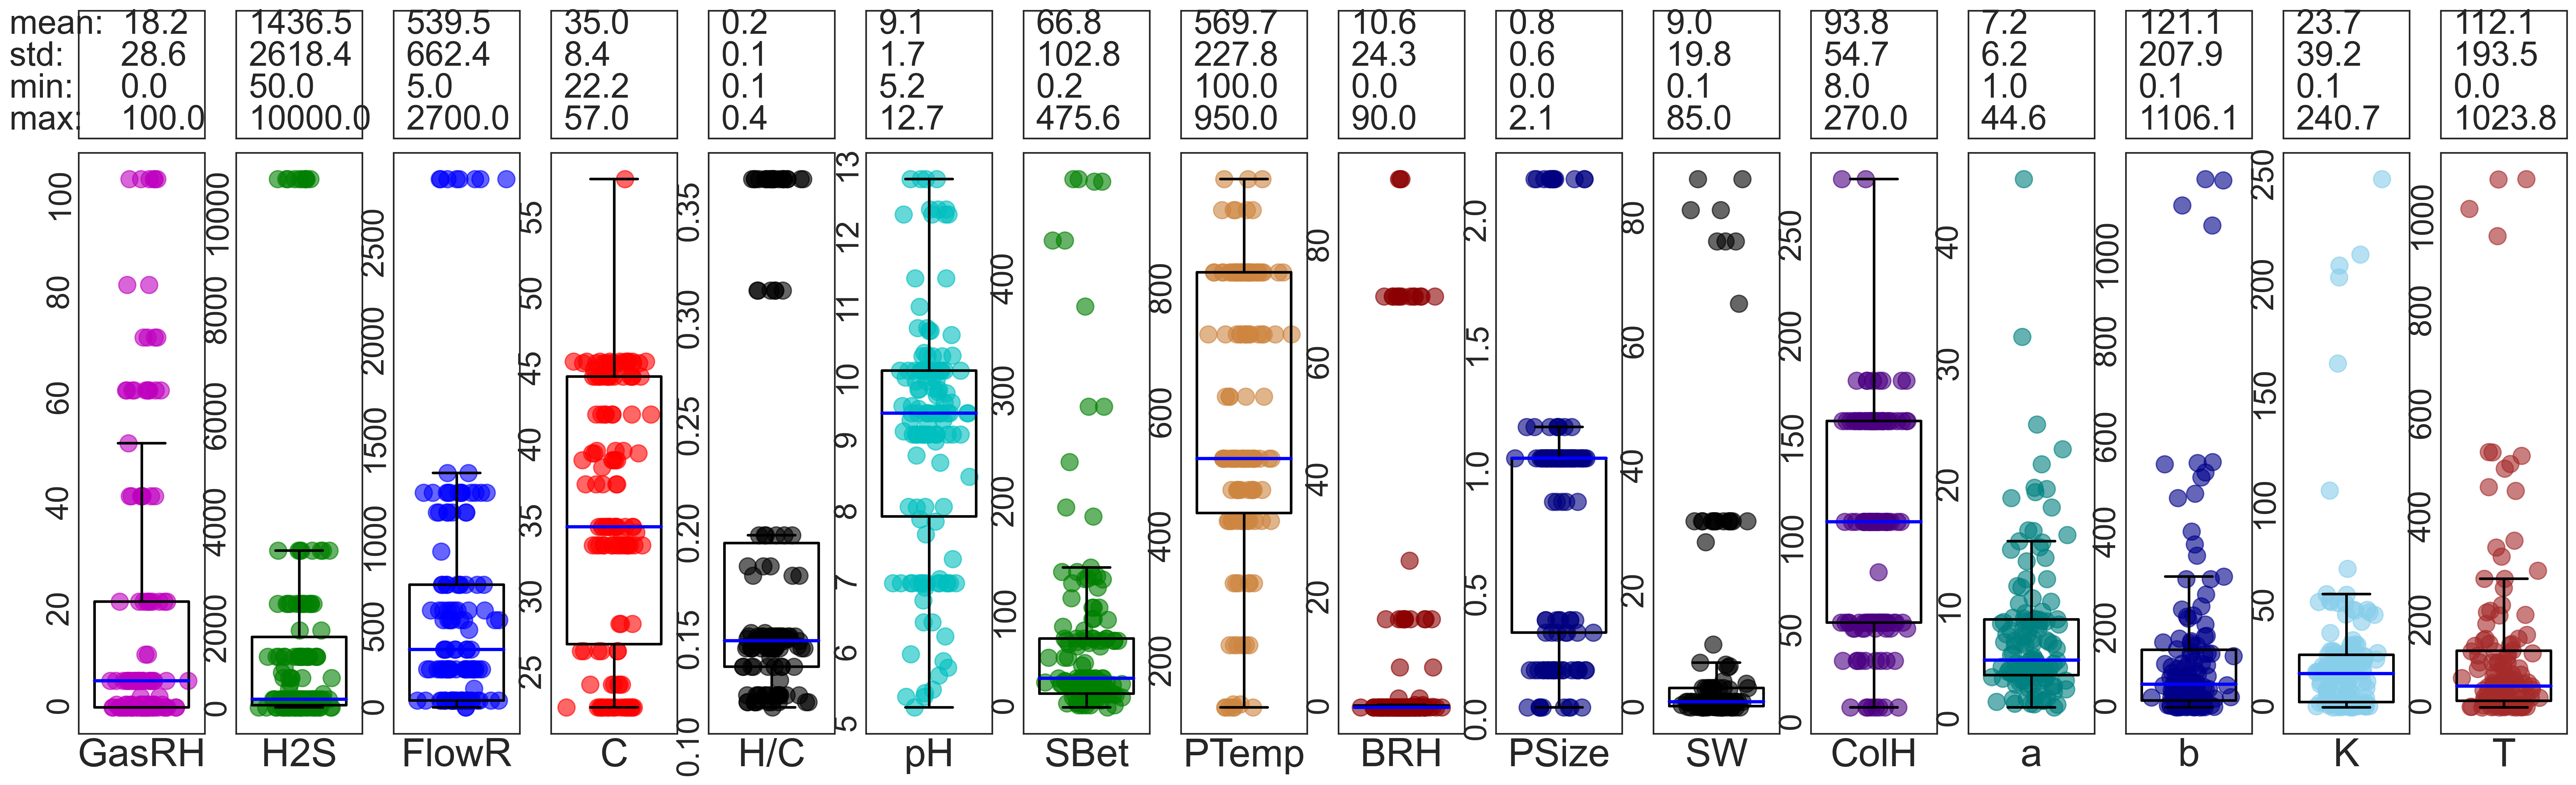

In [5]:
df_col=df.columns
cdf=df.describe()

plt.style.use('seaborn-white')   # default

font1 = {'family':'serif','color':'black'}
font2 = {'family':'serif','color':'darkred'}

# Set the default text font size
plt.rc('font', size=22)
# Set the fig title font size
plt.rc('axes', titlesize=26)
# Set the axes labels font size
plt.rc('axes', labelsize=26)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=30)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=24)
# Set the legend font size
plt.rc('legend', fontsize=22)
# Set the font size of the figure title
plt.rc('figure', titlesize=22)

fig = plt.figure(figsize=(45,10), dpi=300)
gs  = gridspec.GridSpec(2, 21, wspace=0.25, hspace=0.04, height_ratios=[0.22, 1])

cl=['m', 'g', 'b', 'r', 'k', 'c', 'green', 'peru', 'darkred', 'navy', 
       'k', 'indigo', 'teal','darkblue', 'skyblue', 'brown','purple', 'gold', 'brown', 'lime',  'olive', 'purple', 'silver']
j=0
for col in df_col:
    ax = fig.add_subplot(gs[1,j])
    ax=plt.boxplot(df[col], widths=0.75, labels=[col], meanline =True,vert=True,
                showfliers = False,
                medianprops = {"color": "b", "linewidth": 2.5},
                boxprops = {"color": "k", "linewidth": 2},
                whiskerprops = {"color": "k", "linewidth": 2},
                capprops = {"color": "k", "linewidth": 2})
    
    xs, names = [], []
    vals=np.asanyarray(df[col])
    names.append(col)
    xs.append(np.random.normal(1, 0.12, len(df[col])))
    ax=plt.scatter(xs,df[col], alpha= 0.6, marker='o', s=170, color=cl[j])
    plt.yticks(rotation=90)
    plt.xticks(rotation=0)
    
    
    ax1 = fig.add_subplot(gs[0,j])
    if j==0:
        text_mean=  'mean:  ' + str(cdf[col]['mean'].round(1))
        text_std=   'std:      ' + str(cdf[col]['std'].round(1))
        text_min=   'min:     ' + str(cdf[col]['min'].round(1))
        text_max=  'max:    ' + str(cdf[col]['max'].round(1))
        ax1=plt.text(-.55, 0.82, text_mean, fontsize = 26)
        ax1=plt.text(-.55, 0.57, text_std, fontsize = 26)
        ax1=plt.text(-.55, 0.32, text_min, fontsize = 26)
        ax1=plt.text(-.55, 0.07, text_max, fontsize = 26)
    else :
        text_mean= str(cdf[col]['mean'].round(1))
        text_std= str(cdf[col]['std'].round(1))
        text_min= str(cdf[col]['min'].round(1))
        text_max= str(cdf[col]['max'].round(1))            
        ax1=plt.text(0.1, 0.82, text_mean, fontsize = 26)
        ax1=plt.text(0.1, 0.57, text_std, fontsize = 26)
        ax1=plt.text(0.1, 0.32, text_min, fontsize = 26)
        ax1=plt.text(0.1, 0.07, text_max, fontsize = 26)

    plt.yticks([])
    plt.xticks([])
    j=j+1
